In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
# load the data from csv file to Pandas DataFrame
titanic_data=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [14]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# number of rows and Columns
titanic_data.shape

(891, 12)

In [16]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# to find out duplicate rows
df.duplicated().sum() 

0

# Handling missing values

In [18]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [19]:
titanic_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,S
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,C
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,S


In [20]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [22]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [23]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [24]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [25]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Exploratory Data Analysis (EDA)

In [26]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [30]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

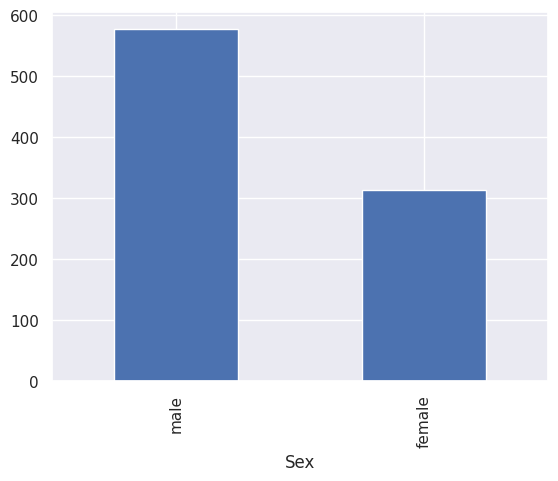

In [37]:
df['Sex'].value_counts().plot(kind='bar')  #for categorical columns

<Axes: ylabel='count'>

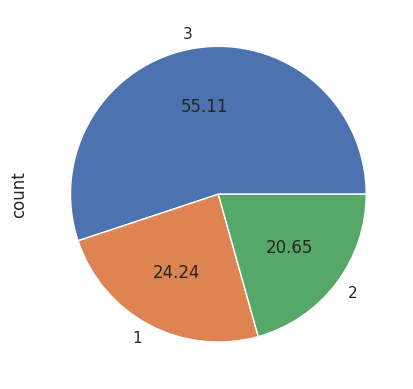

In [38]:
#if the data is requrired in percentage use pie chart
df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

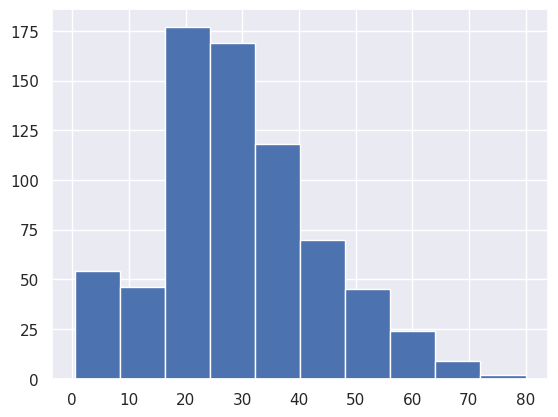

In [39]:
plt.hist(df['Age'],bins=10)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

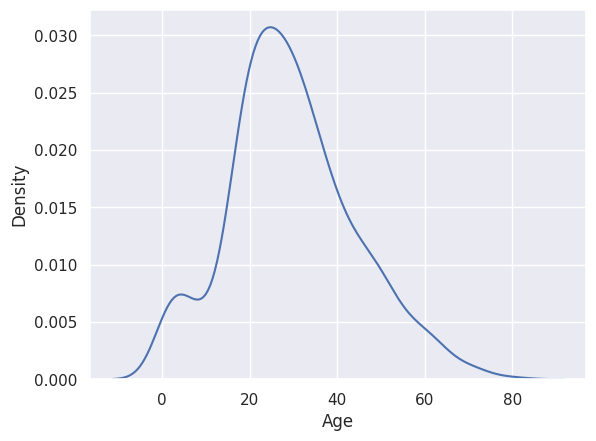

In [40]:
sns.kdeplot(df['Age']) #Probability Density Funcion of 'Age'

In [42]:
df['Age'].skew()

0.38910778230082704

<Axes: >

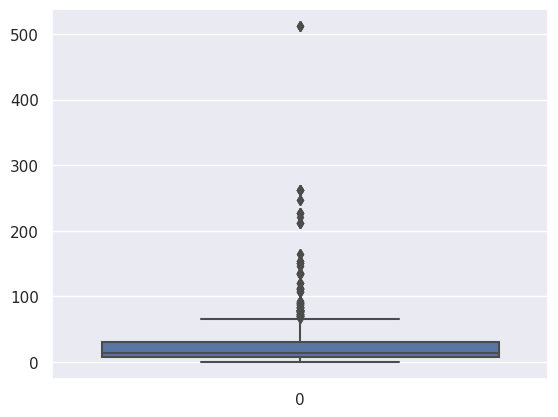

In [43]:
sns.boxplot(df['Fare'])  #5 point values Q1 Q3 median min_calc max_calc

<Axes: xlabel='Pclass', ylabel='Fare'>

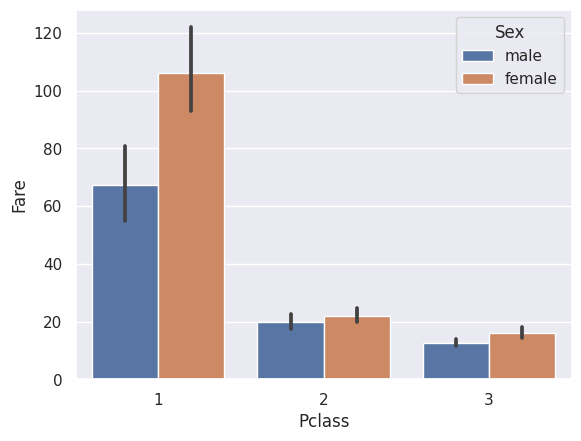

In [45]:
sns.barplot(x=titanic_data['Pclass'],y=titanic_data['Fare'],hue=titanic_data['Sex'])  #(Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

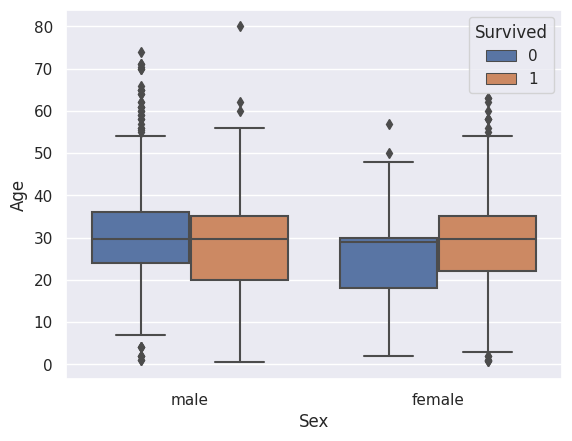

In [46]:
sns.boxplot(x=titanic_data['Sex'],y=titanic_data['Age'],hue=titanic_data['Survived'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

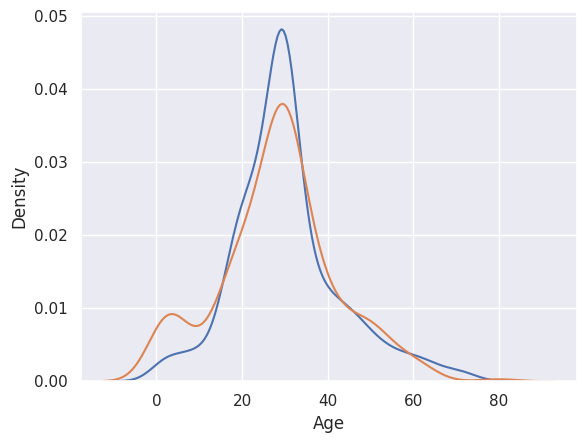

In [47]:
sns.kdeplot(titanic_data[titanic_data['Survived']==0]['Age'])
sns.kdeplot(titanic_data[titanic_data['Survived']==1]['Age'])

In [49]:
pd.crosstab(titanic_data['Embarked'],titanic_data['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

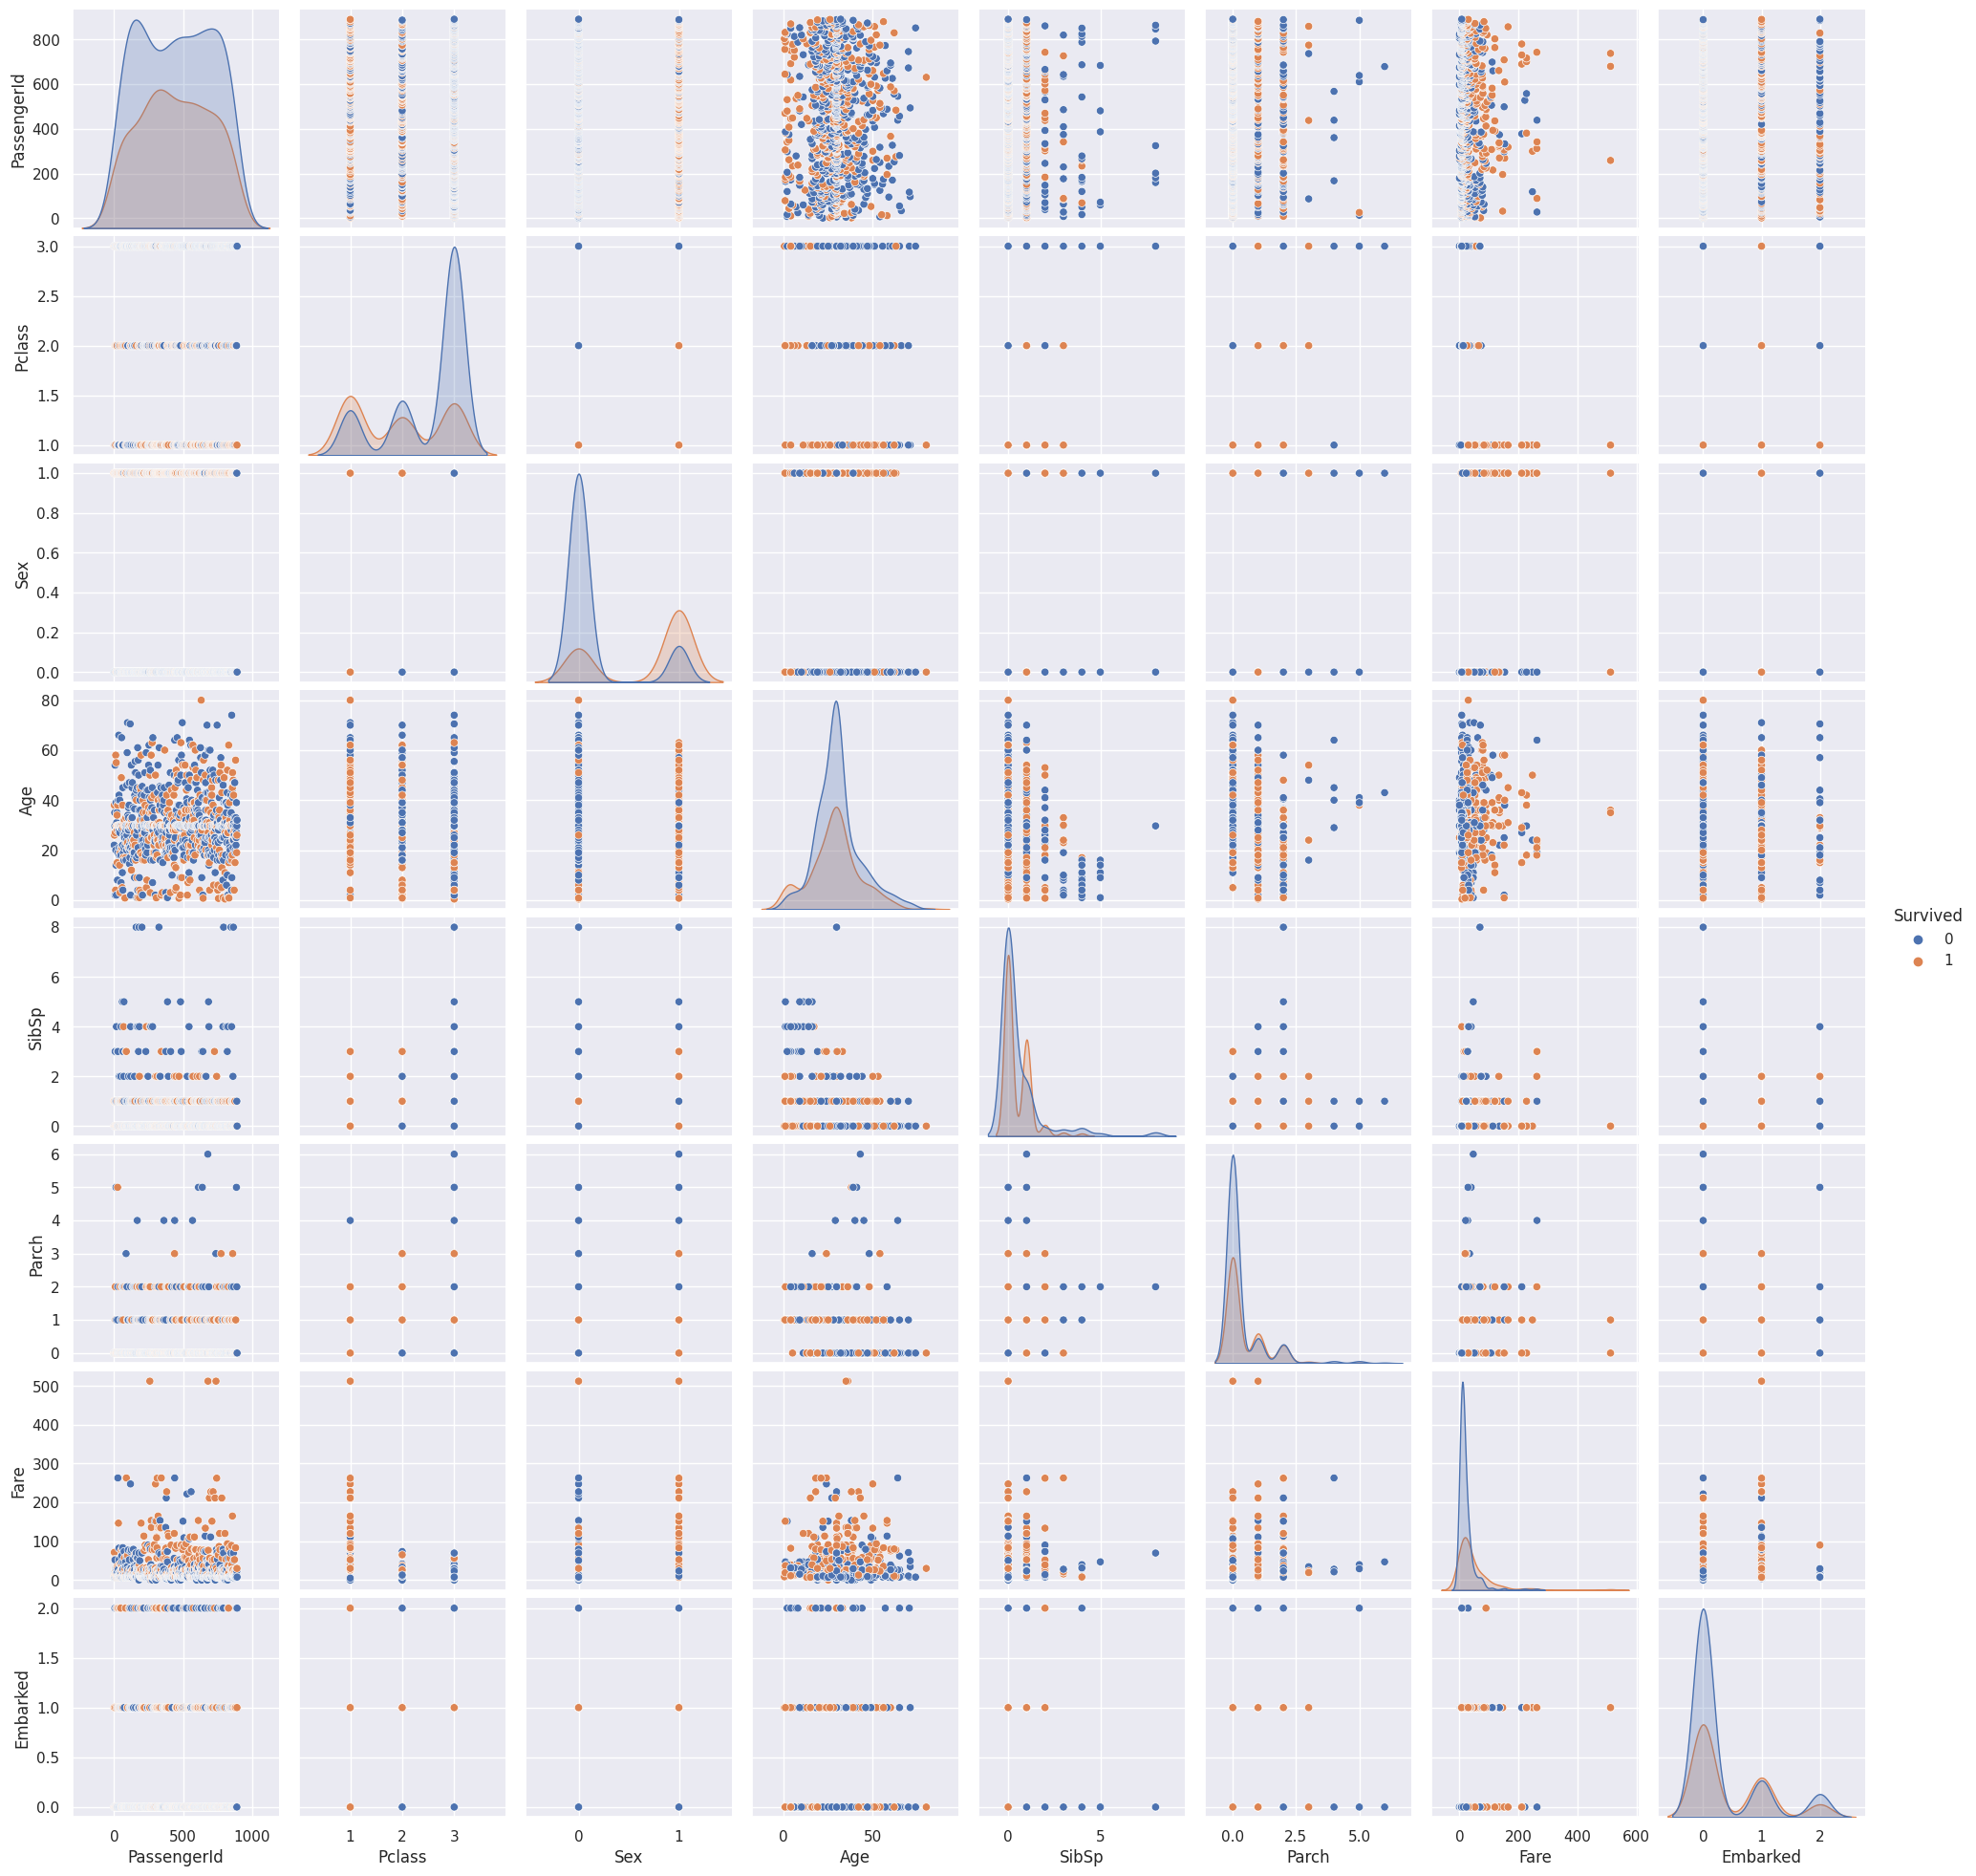

In [52]:
sns.pairplot(titanic_data,hue='Survived')  # (Numerical - Numerical)

# Encoding Categorical Columns

In [51]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

/tmp/ipykernel_33/807954839.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [53]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Seperating Feature and target columns

In [54]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [63]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [64]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Splitting the data into training data & Test data


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [56]:
print(X_train.shape, X_test.shape)

(712, 7) (179, 7)


# Logistic Regression

In [57]:
model = LogisticRegression()

In [58]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [59]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [60]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [61]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [62]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329
